# Tutorial 2
## Exercise 2: ``import``, ``odeint`` and functions

Let's first import the libraries that we will be using.

Notice the following:
1. We are importing the ``numpy`` library and from now on, we call it ``np``.
2. From the ``scipy`` library, we are importing the ``odeint`` module from the ``integrate`` package.
3. From ``matplotlib``, we are importing the ``pyplot`` package as ``plt``. 

Pay attention to how these libraries, packages, and modules are called in the code below.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

``odeint`` is a Python module that allows us to integrate a system of ordinary differential equations (ODEs).

A good starting point for everything is to read the documentation:<br>
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html>

Notice that we have to provide three **mandatory** *positional arguments*: 
1. a function ``func``
2. a set of initial conditions `y0`
3. the duration for which we want to solve the ODEs `t`

The rest of the arguments are optional *keyword arguments*.

## Exercise 3: Our first problem
We want to solve the harmonic oscillator problem on page 17 of the lecture notes by Klein et al. (2011), i.e.

$$m \ddot{x} = - cx - k \dot{x} + F_D(t),$$

which is best explained by the following illustration from the lecture notes...

<center><img src="./img/oscillator.png" style="width: 200px;" /></center>

The analytical solutions are already given in the lecture notes and we want solve the problem computationally.

Say as a first step, we want to solve a simple spring-mass system without any damping and without any forcing, i.e. $k=0$, $F_D \equiv 0$. We then want to reproduce Figure 4 in the lecture notes.

How do you suggest we start tackling this problem?

### Hints:

1. Recall that we need three inputs: a function, an initial condition, and a duration.
2. What should be our function here?
3. Our problem is a second-order ODE, where $\ddot{x}$ is is the second-order derivative with respect to time $t$. On the other hand, `odeint` solves a (system of) first-oder ODE(s). What must we do to make the function work with `odeint`?

$$z = x'$$

$$mz'=-cx-kz+F_d$$

In [2]:
# Try out your solution here:

def osc(y, t, m, c, k, Fd):
    x, z = y
    return [z, (-c*x-k*z+Fd(t))/m]


In [54]:
m,c,k,Fd = 1,10,0,0
t = np.linspace(0,10,101)
y0  = [0,1]
sol = odeint(osc, y0, t, args=(m,c,k,Fd))

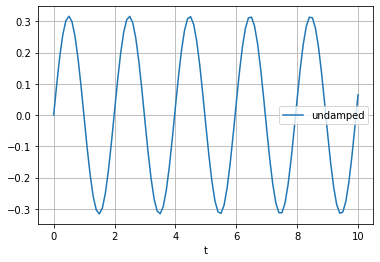

In [55]:
# Here are some code to help you plot the solution.

plt.plot(t, sol[:, 0], label='undamped')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Exercise 4: Reproduce Figure 5

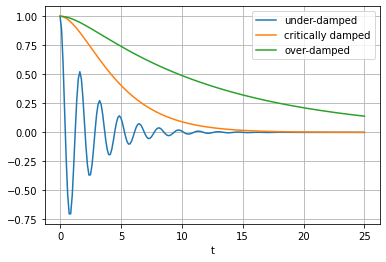

In [9]:

m = 1
k = 0.8
Fd = 0

c=k**2/(4*m)

t = np.linspace(0,25,201)
y0  = [1,0]
# Try out your solution here:
# D < 0, under-damped


# D = 0, critically damped


# D > 0, over-damped

sol = []
for a in [15,0,-0.1]:
    sol.append(odeint(osc, y0, t, args=(m,c+a,k,Fd)))
undr_damped, crit_damped, over_damped = sol
# Let's plot the solutions
plt.plot(t, undr_damped[:, 0], label='under-damped')
plt.plot(t, crit_damped[:, 0], label='critically damped')
plt.plot(t, over_damped[:, 0], label='over-damped')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Exercise 5:
1. Reproduce the graphs in Figure 6 (you don't have to reproduce them *exactly*).
2. In the process, develop an intuition for the harmonic oscillator.

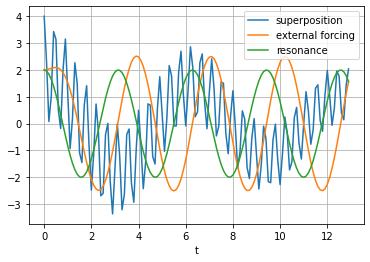

In [19]:
m = 1
k = 0.1
c=1
omega = 2
Fd = lambda t: 0
c_res = m*omega**2

t = np.arange(0,13,0.1)
y0  = [2,0]


slow = odeint(osc, y0, t, args=(m,c,k,Fd))
fast = odeint(osc, y0, t, args=(m,c*200,k,Fd))
superposition = slow + fast

Fd = lambda t: 10*np.cos(omega*t)
external_forcing = odeint(osc, y0, t, args=(m,c_res,2,Fd))

Fd = lambda t: 0
resonance = odeint(osc, y0, t, args=(m,c_res,0,Fd))

plt.plot(t, superposition[:, 0], label='superposition')
plt.plot(t, external_forcing[:, 0], label='external forcing')
plt.plot(t, resonance[:, 0], label='resonance')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# Reference
Klein, Rupert, et al. "Multiple scales methods in meteorology." Asymptotic Methods in Fluid Mechanics: Survey and Recent Advances. 2010. 127-196.